# Burrows-Wheeler Transform (QBWT)

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [16]:
def cyc_perm(seq):
    # Compute all cyclic permutations of seq
    perms = [seq[i:] + seq[:i] for i in range(len(seq))]
    # Remove duplicates
    unique_perms = list(set(perms))
    return unique_perms

def arrange(seq):
    # Alphabetically arrange all permutations of seq
    perms = cyc_perm(seq)
    sorted_perms = sorted(perms)
    return sorted_perms

def extract(perms):
    # Extract the last base from each permutation
    terminal_bases = [perm[-1] for perm in perms]
    return terminal_bases

def qbwt(seq):
    # Initialize quantum circuit with n qubits
    n = len(seq)
    qreg = QuantumRegister(n, 'q')
    qc = QuantumCircuit(qreg)

    # Apply BW transform classically
    perms = arrange(seq)
    bwt = ''.join([perm[-1] for perm in perms])

    # Apply quantum phase estimation
    for i, base in enumerate(seq):
        # Count number of occurrences of base in bwt
        count = bwt.count(base)
        # Apply rotation gate
        theta = 2 * np.pi * count / n
        qc.ry(theta, qreg[i])
        qc.h(qreg[i])
    
    # Measure all qubits
    qc.measure_all()

    # Run the circuit on a simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()

    # Return the counts of each measurement outcome
    counts = result.get_counts(qc)
    return counts


{'00100000000': 5, '00010010000': 1, '00000001100': 1, '00000000010': 6, '00001000000': 6, '00010010100': 1, '00000000001': 2, '00000000100': 36, '00000010000': 6, '01000000000': 4, '00000000000': 894, '00010000001': 1, '10000000000': 6, '00010000100': 1, '00000100000': 2, '00000001000': 4, '00010000000': 48}


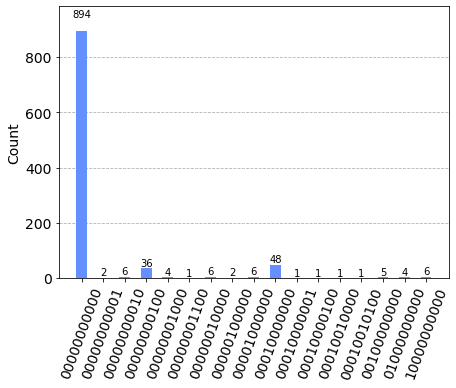

In [13]:
seq =  "ACTGACGTAGC"
counts = qbwt(seq)
print(counts)
hist = plot_histogram(counts, sort='value_desc')
plot_histogram(counts)